In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train_data = pd.read_csv('F:/ml-data/disaster/train.csv')
test_data = pd.read_csv('F:/ml-data/disaster/test.csv')

In [3]:
train_data['train_test'] = 1
test_data['train_test'] = 0
test_data['Survived'] = np.NaN
all_data = pd.concat([train_data, test_data])

In [4]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  train_test   418 non-null    int64  
 12  Survived     0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [8]:
train_data.select_dtypes(include=['int64', 'float64']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [9]:
train_data.shape

(891, 13)

In [10]:
test_data.shape

(418, 13)

<Figure size 4320x4320 with 0 Axes>

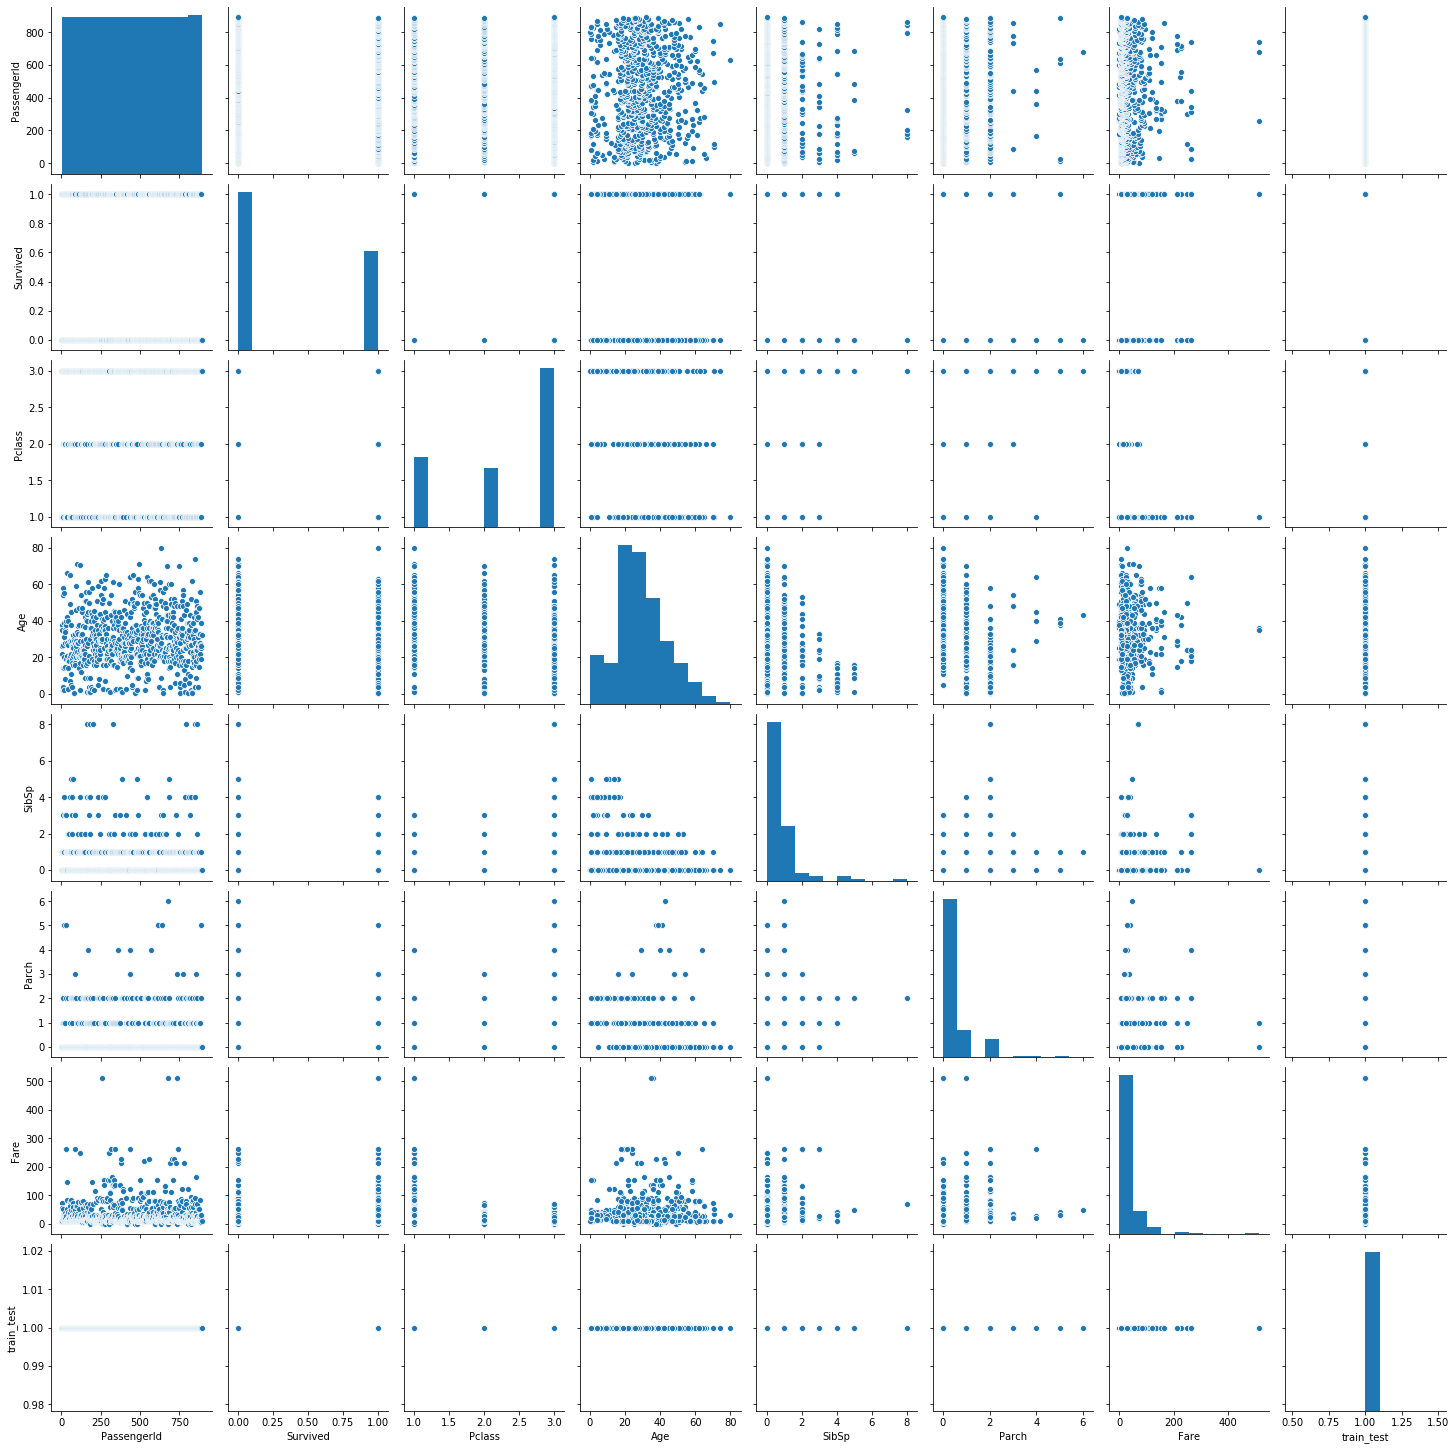

In [17]:
plt.figure(figsize=(60,60))
data_plot = train_data[train_data.describe().columns]
sns.pairplot(data_plot)
plt.show()

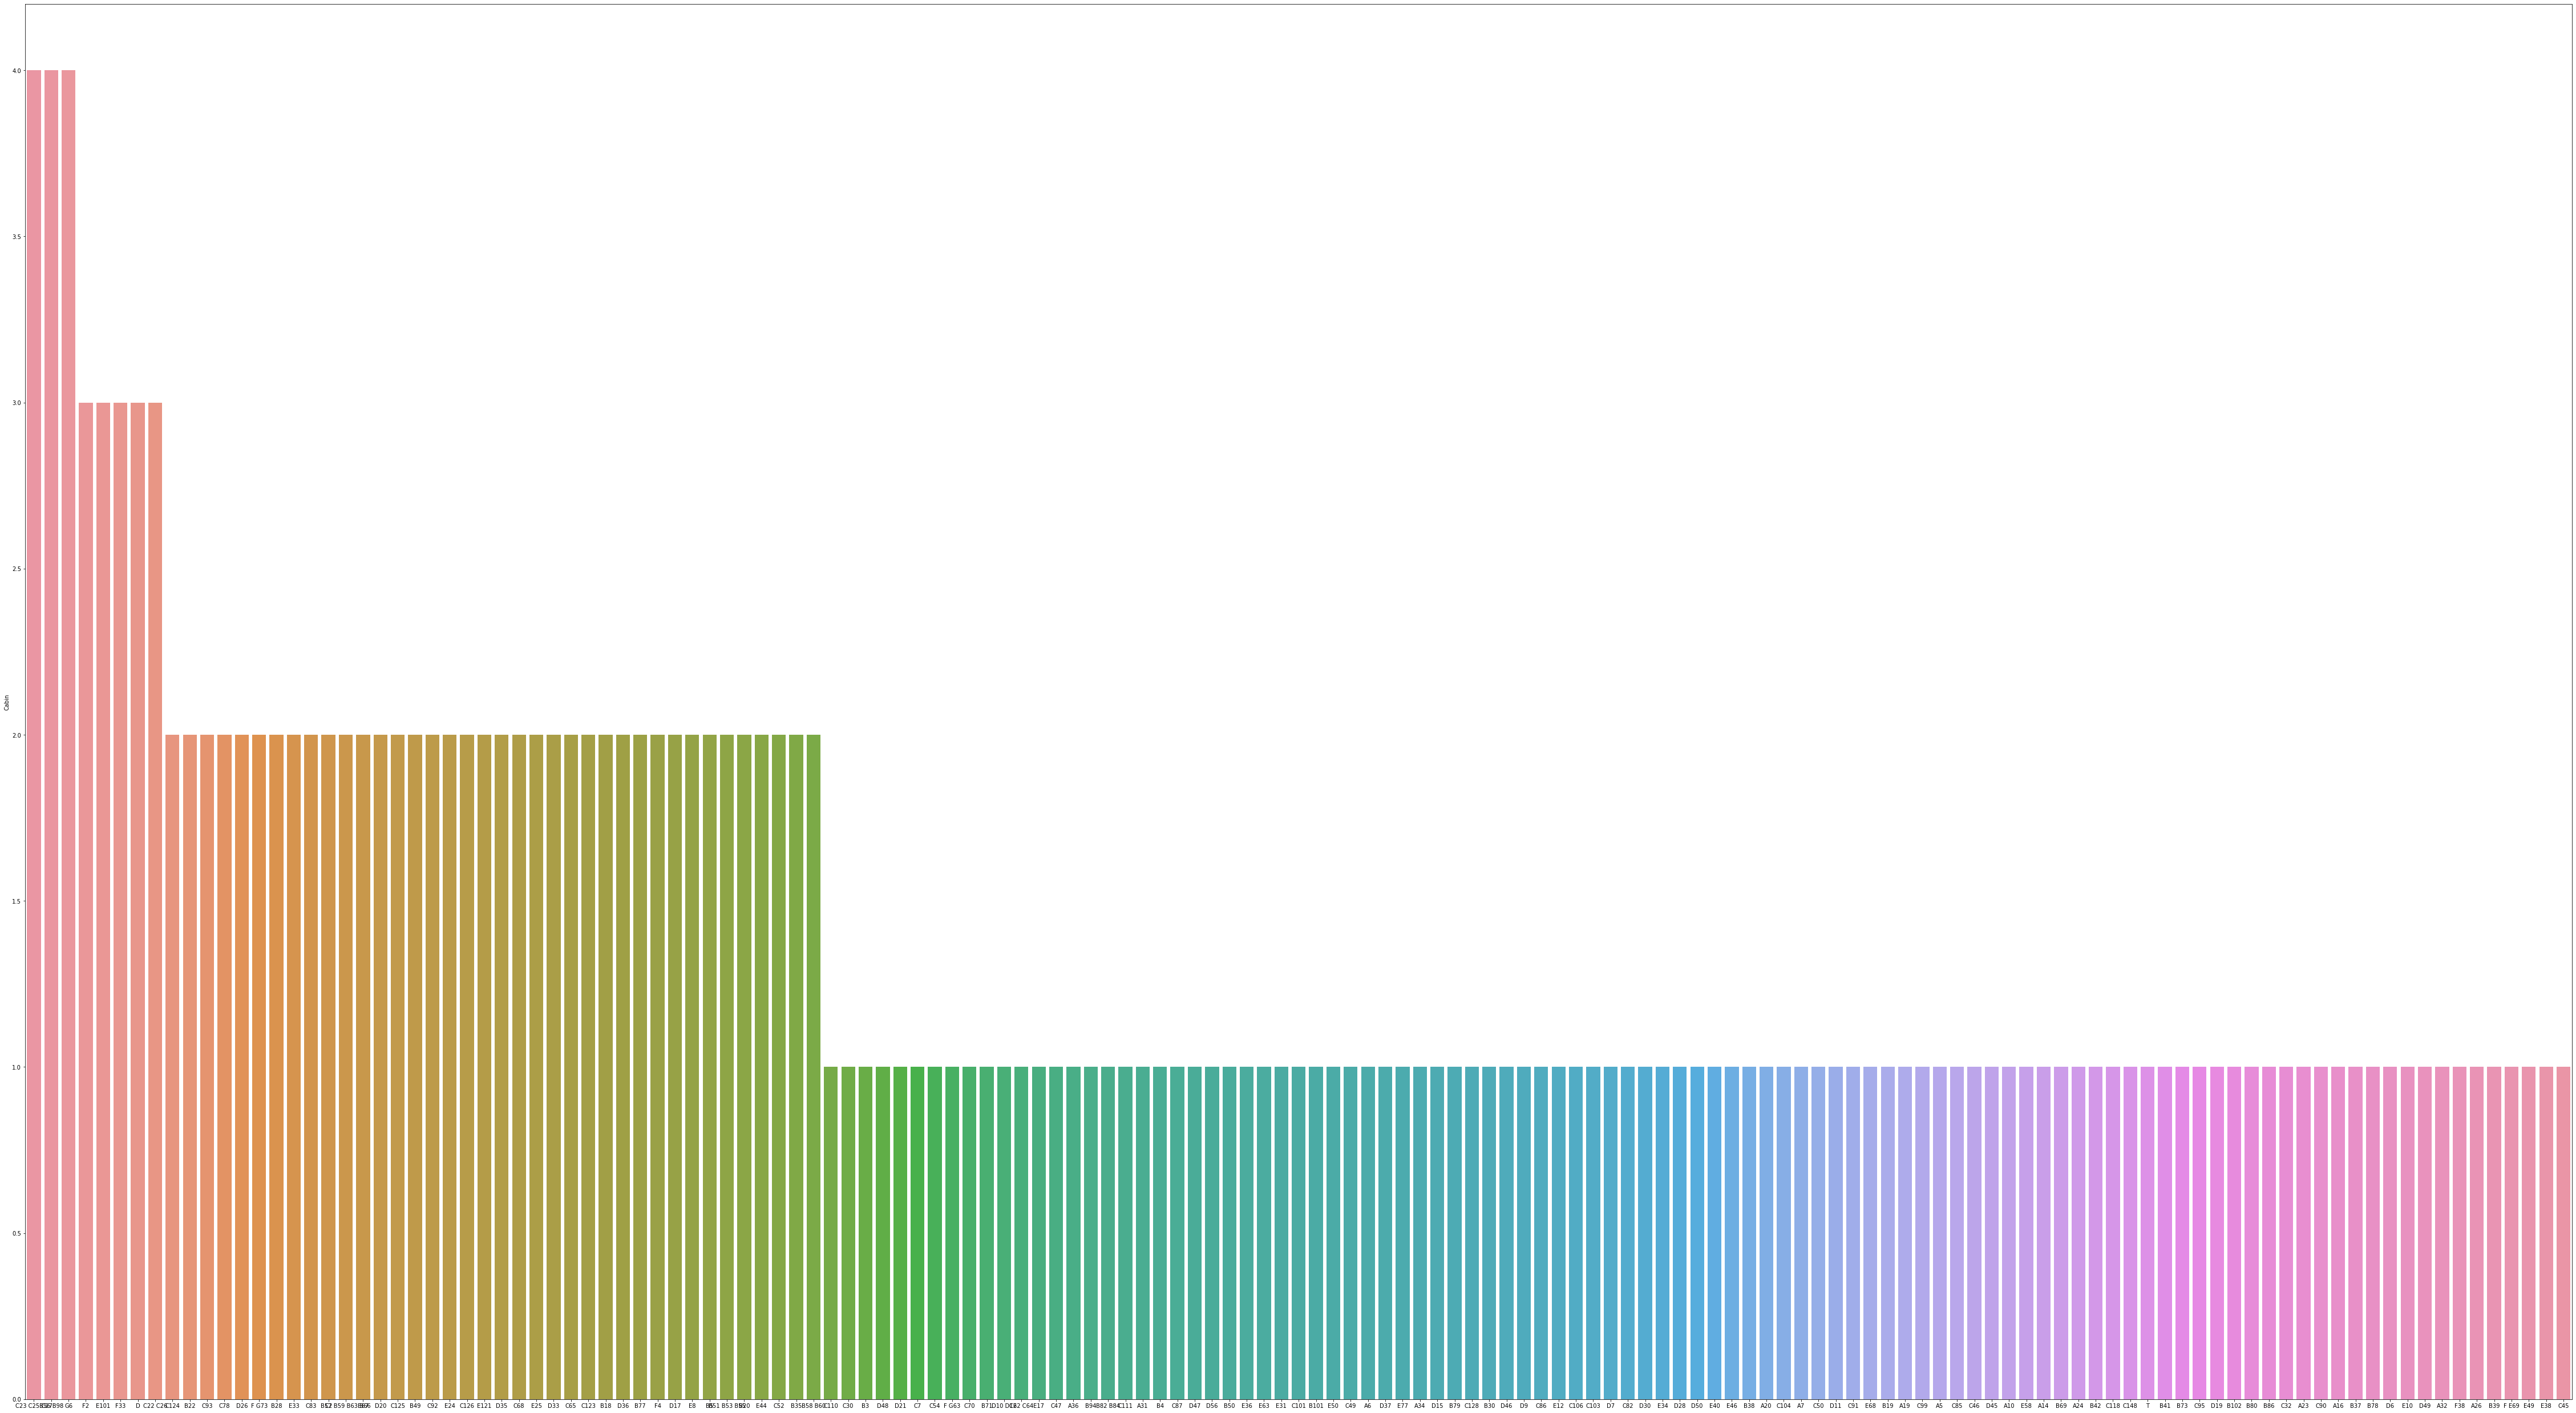

In [16]:
plt.figure(figsize=(80, 45))
sns.barplot(train_data['Cabin'].value_counts().index, train_data['Cabin'].value_counts())
plt.show()

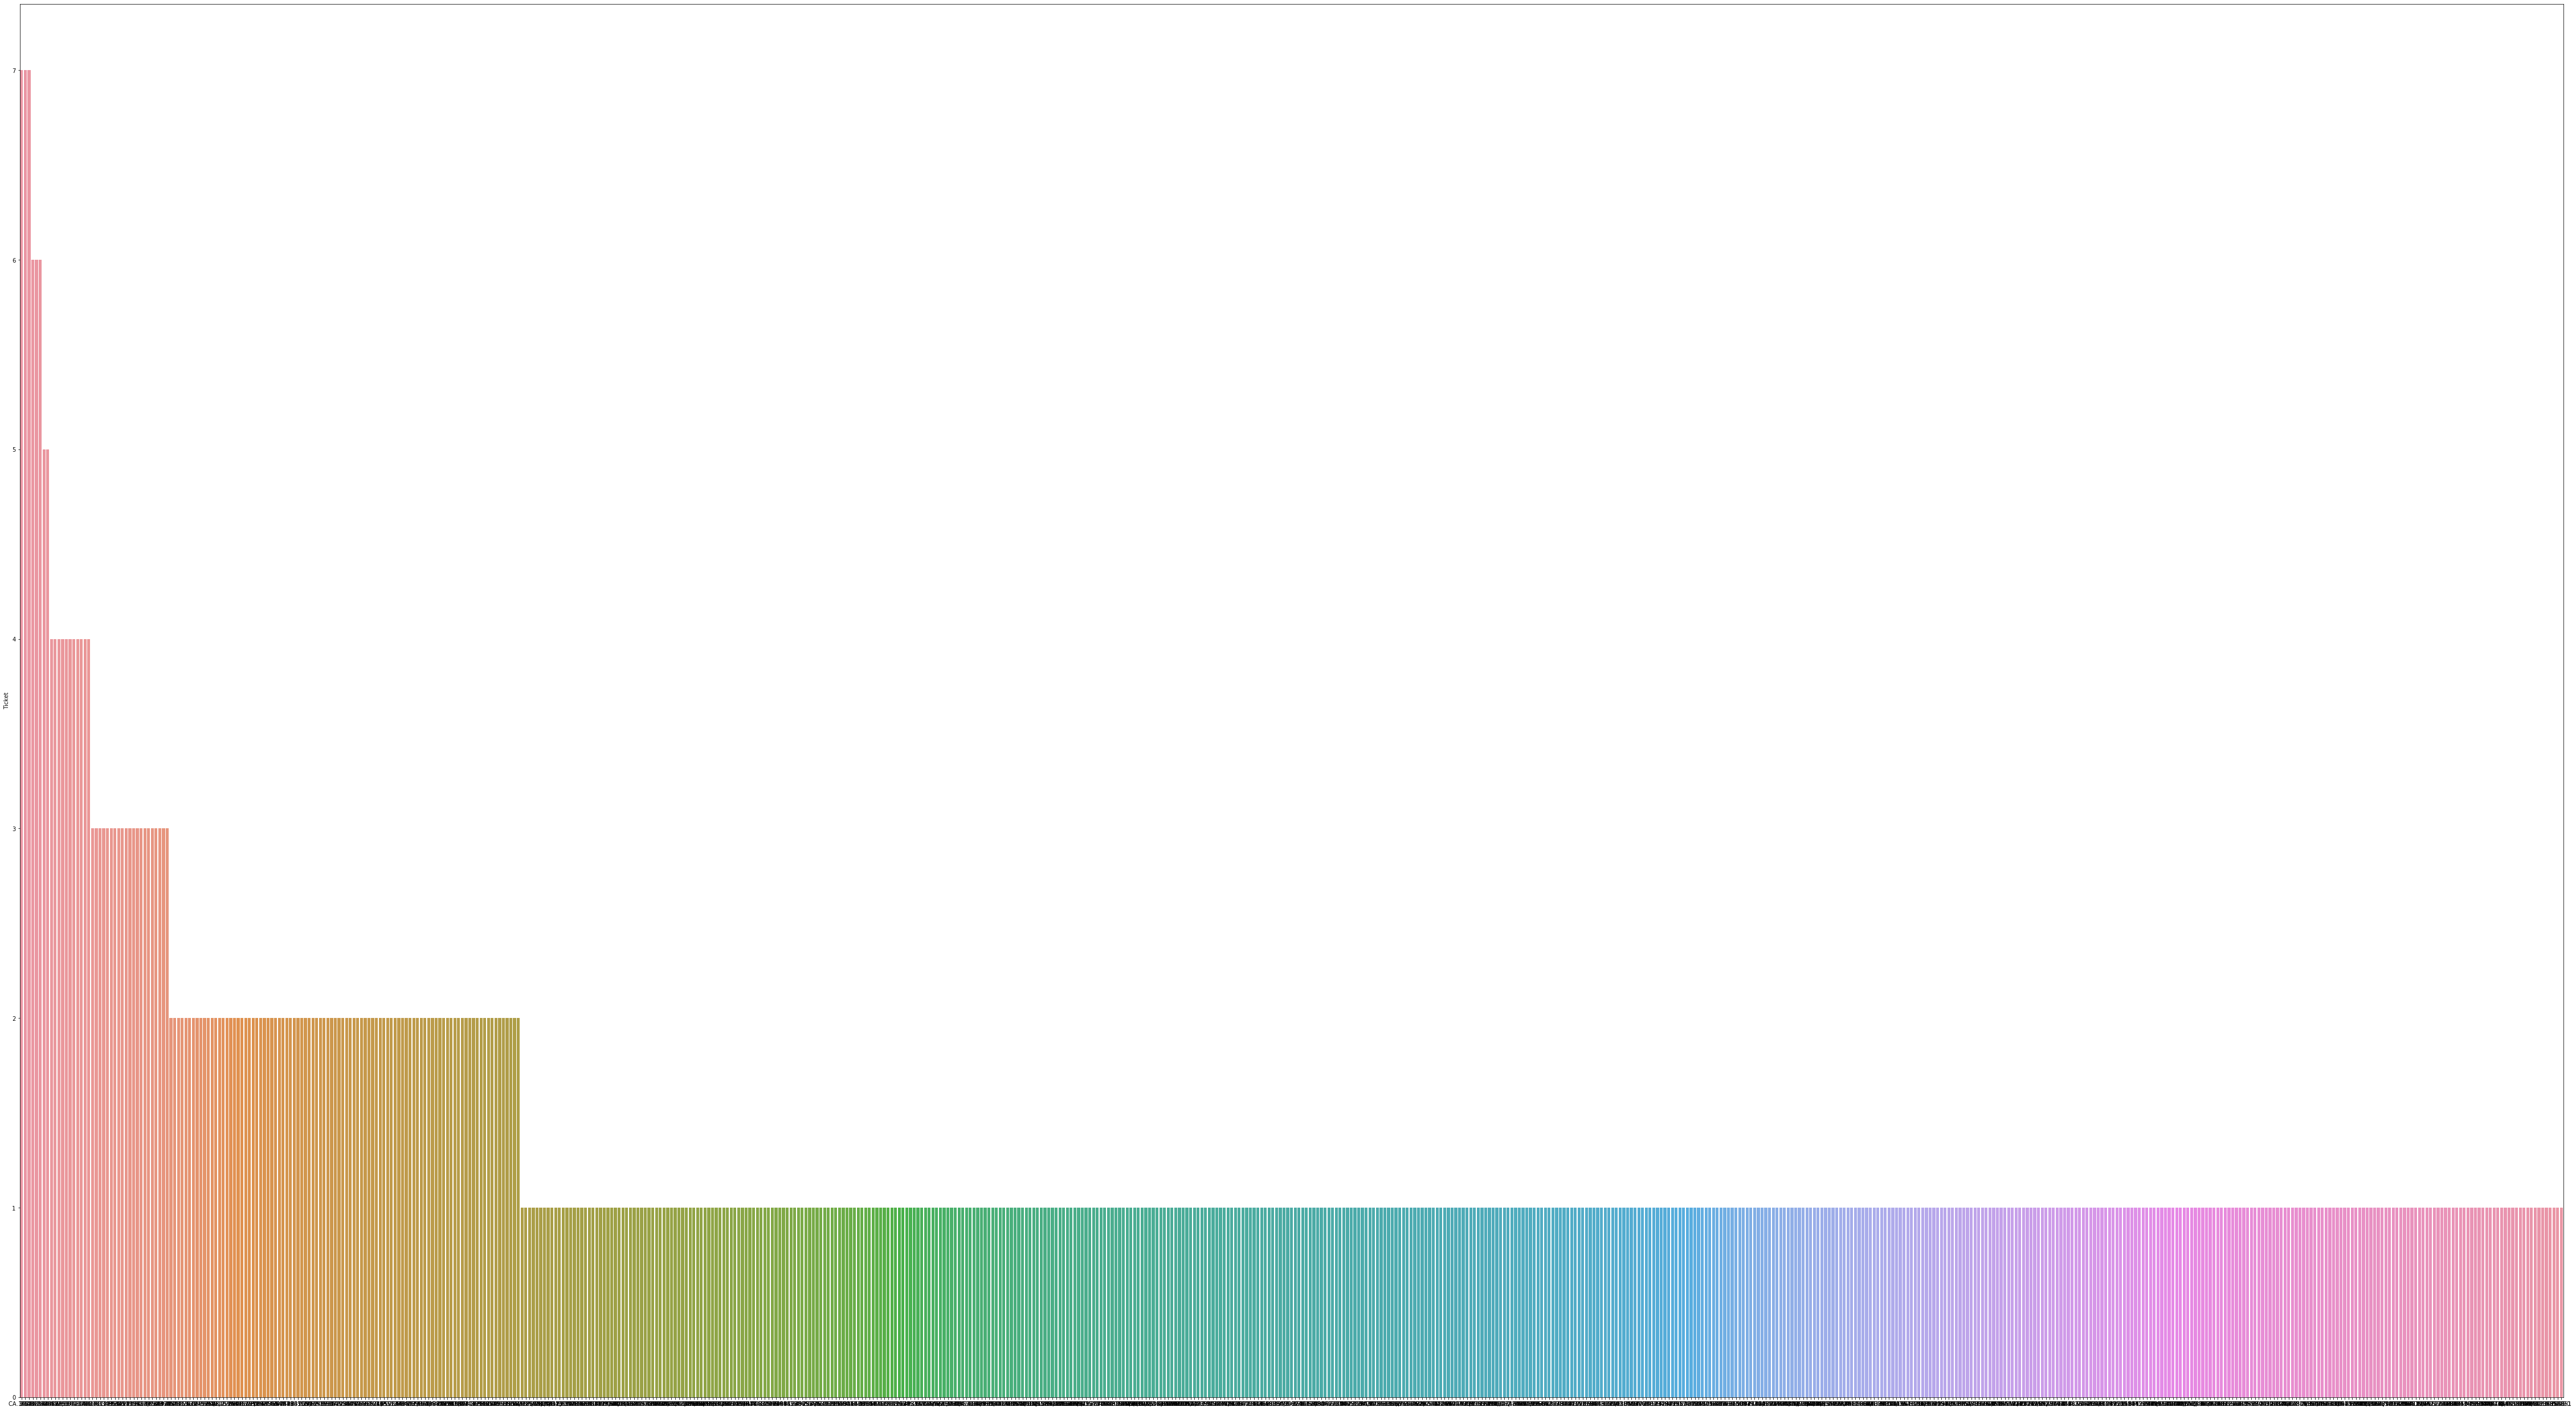

In [18]:
plt.figure(figsize=(80, 45))
sns.barplot(train_data['Ticket'].value_counts().index, train_data['Ticket'].value_counts())
plt.show()

### 特征工程

In [19]:
## 是否多个隔间（房间？)
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [20]:
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])

In [22]:
## 数字型船票
all_data['numereic_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)                        

In [25]:
## 字母型船票
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() 
                                                  if len(x.split(' ')[: -1]) > 0 else 0)

In [27]:
## 称呼
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [30]:
## 空值补全
all_data.Age = all_data.Age.fillna(train_data.Age.median())
all_data.Fare = all_data.Fare.fillna(train_data.Fare.median())

In [34]:
## 删除空值数据
all_data.dropna(subset=['Embarked'], inplace = True)

In [36]:
all_data['norm_sibsp'] = np.log(all_data.SibSp + 1)
all_data['norm_fare'] = np.log(all_data.Fare + 1)

In [37]:
all_data.Pclass = all_data.Pclass.astype(str)

In [39]:
### 类别转列名
all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked',
                                      'cabin_adv', 'cabin_multiple', 'numereic_ticket', 'name_title', 'train_test']])

In [40]:
train_x = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
test_x = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

In [41]:
train_y = all_data[all_data.train_test == 1].Survived

In [42]:
train_x.shape

(889, 41)

In [44]:
train_y.shape

(889,)

### 数据归一化

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
all_dummies_scaler = all_dummies.copy()
all_dummies_scaler[['Age', 'SibSp', 'Parch', 'norm_fare']] = scaler.fit_transform(all_dummies_scaler[['Age', 'SibSp', 'Parch', 'norm_fare']])
all_dummies_scaler

,Age,SibSp,Parch,norm_fare,cabin_multiple,numereic_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.580261,0.480272,-0.445407,-0.896331,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.662297,0.480272,-0.445407,1.347870,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.269621,-0.479537,-0.445407,-0.815013,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.429318,0.480272,-0.445407,1.048255,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.429318,-0.479537,-0.445407,-0.800632,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.114301,-0.479537,-0.445407,-0.800632,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
414,0.739957,-0.479537,-0.445407,1.781098,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
415,0.701127,-0.479537,-0.445407,-0.896331,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
416,-0.114301,-0.479537,-0.445407,-0.800632,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [60]:
scaler_train_x = all_dummies_scaler[all_dummies_scaler['train_test'] == 1].drop(['train_test'], axis = 1)
scaler_test_x = all_dummies_scaler[all_dummies_scaler['train_test'] == 0].drop(['train_test'], axis = 1)
train_y = all_data[all_data['train_test'] == 1].Survived

In [61]:
scaler_test_x.head()

,Age,SibSp,Parch,norm_fare,cabin_multiple,numereic_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,0.390488,-0.479537,-0.445407,-0.826172,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1.361236,0.480272,-0.445407,-0.928150,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,2.526134,-0.479537,-0.445407,-0.628665,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.191961,-0.479537,-0.445407,-0.732917,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.580261,0.480272,0.709647,-0.403510,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


### 算法分类

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [66]:
### 朴素贝叶斯
gnb = GaussianNB()
### 逻辑回归
logic = LogisticRegression(max_iter=2000)
### K近邻
knn = KNeighborsClassifier()
### 随机森林
rf = RandomForestClassifier(random_state=1)
### SVM
svc = SVC(probability=True)
### XGB
xgb = XGBClassifier(random_state = 1)

model_list = [gnb, logic, knn, rf, svc, xgb]
for model in model_list:
    print('\n')
    print(model)
    cv = cross_val_score(model, train_x, train_y, cv = 5)  ## 交差验证 分成5分
    print(cv)
    print(cv.mean())



GaussianNB(priors=None, var_smoothing=1e-09)
[0.66853933 0.70224719 0.76966292 0.75842697 0.72881356]
0.7255379927632831


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[0.76966292 0.79775281 0.80898876 0.82022472 0.85310734]
0.8099473116231829


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_sample

### 参数调优 -- 网格搜索和随机搜索

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [71]:
def performance(clf_model, model_name):
    print(model_name)
    print('Best score:', str(clf_model.best_score_))
    print('Best parma:', str(clf_model.best_params_))

In [72]:
lr = LogisticRegression()
param_grid = {
    'max_iter': [2000],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}
lr_gs = GridSearchCV(lr, param_grid=param_grid, cv =5, verbose=True, n_jobs=-1)
best_lr = lr_gs.fit(scaler_train_x, train_y)
performance(best_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.6s


Logistic Regression
Best score: 0.8279375357074843
Best parma: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.8s finished


In [75]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1,2]
}
knn_gs = GridSearchCV(knn, param_grid= param_grid, cv =5, verbose=True, n_jobs= -1)
best_knn = knn_gs.fit(scaler_train_x, train_y)
performance(best_knn, 'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.6s


KNN
Best score: 0.8279375357074843
Best parma: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.9s finished


In [93]:
svc = SVC(probability=True)   ## probability = true 对分类结果的给出概率判断 。 作为votingclassfier 中的投票中的一员， 对soft-vote来说是必须的。
param_grid = [{
    'kernel': ['rbf'],
    'gamma': [0.1, 0.5, 1, 2, 5],
    'C': [0.1, 1, 10, 100, 1000]    
    }, 
    {
        'kernel': ['linear'],
         'C': [0.1, 1, 10, 100, 100]     
    },
    {
        'kernel':['poly'],
        'degree':[2,3,4,5],
        'C':[0.1, 1, 10, 100, 1000]
    }]
scv_gs = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose=True, n_jobs= -1)
best_svc = scv_gs.fit(scaler_train_x, train_y)
performance(best_svc, 'SVC')

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.2min finished


SVC
Best score: 0.8335555132355742
Best parma: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [79]:
rf = RandomForestClassifier(random_state=1)
param_grid = {
    'n_estimators': [400, 450, 500, 550],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True],
    'max_depth': [15, 20, 25],
    'max_features': ['auto', 'sqrt', 10],
    'min_samples_leaf': [2,3,4,5],
    'min_samples_split': [2,3,4,5]
}
rf_gs = GridSearchCV(rf, param_grid=param_grid, cv = 5, verbose=True, n_jobs= -1)
best_rf = rf_gs.fit(scaler_train_x, train_y)
performance(best_rf, 'Random Forest')

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 29.9min finished


Random Forest
Best score: 0.8369326477496349
Best parma: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 450}


In [80]:
xgb = XGBClassifier(random_state = 1)
param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[0.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

xgb_gs = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_xgb_rnd = xgb_gs.fit(scaler_train_x, train_y)
performance(best_xgb_rnd, 'XGB')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 743 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1340 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2536 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3688 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4838 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  6.9min finished


XGB
Best score: 0.849273154319812
Best parma: {'subsample': 0.9, 'sampling_method': 'uniform', 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1}


###  投票算法

In [95]:
best_lr_estimator = best_lr.best_estimator_
best_knn_estiomator = best_knn.best_estimator_
best_svc_estimator = best_svc.best_estimator_
best_rf_estimator = best_rf.best_estimator_
best_xgb_estimator = best_xgb_rnd.best_estimator_

In [96]:
from sklearn.ensemble import VotingClassifier
from itertools import combinations 

In [103]:
comb_name = []
hard_result = []
soft_result = []
list_models = [('lr', best_lr_estimator), ('knn', best_knn_estiomator), ('svc', best_svc_estimator)
              ,('rf', best_rf_estimator), ('xgb', best_xgb_estimator)]

In [104]:
for r in range(3, 6):
    soft_comb = combinations(list_models, r)  ## 取组合数， 从5个estimator中取出3--5个estimator进行投票
    for i in soft_comb:
        i = list(i)       ## 组合的estimator列表  [('lr', best_lr_estimator), ('knn', best_knn_estimator), ...]
        model_name = []
        for k in i:
            model_name.append(k[0])
        print('\n')
        print('Voting classifier for {}'.format(model_name))
        comb_name.append(model_name)
        hard_vc = VotingClassifier(estimators = i, voting = 'hard') 
#       print('voting_hard :',cross_val_score(hard_vc, train_x, train_y,cv=5))
        print('voting_hard mean :',cross_val_score(hard_vc,train_x,train_y,cv=5).mean())
        hard_result.append(cross_val_score(hard_vc, train_x,train_y,cv=5).mean())
        soft_vc = VotingClassifier(estimators = i, voting = 'soft')
#       print('voting_soft :',cross_val_score(soft_vc, train_x, train_y,cv=5))
        print('voting_soft mean :',cross_val_score(soft_vc,train_x,train_y,cv=5).mean())
        soft_result.append(cross_val_score(soft_vc,train_x,train_y,cv=5).mean())



Voting classifier for ['lr', 'knn', 'svc']
voting_hard mean : 0.8088046721259442
voting_soft mean : 0.812188154637212


Voting classifier for ['lr', 'knn', 'rf']
voting_hard mean : 0.8346854567383989
voting_soft mean : 0.8346981527328129


Voting classifier for ['lr', 'knn', 'xgb']
voting_hard mean : 0.8425379292833112
voting_soft mean : 0.8391671427664571


Voting classifier for ['lr', 'svc', 'rf']
voting_hard mean : 0.8324573097187837
voting_soft mean : 0.831321018218752


Voting classifier for ['lr', 'svc', 'xgb']
voting_hard mean : 0.838056243255253
voting_soft mean : 0.8403034342664888


Voting classifier for ['lr', 'rf', 'xgb']
voting_hard mean : 0.8492858503142259
voting_soft mean : 0.8470450073001968


Voting classifier for ['knn', 'svc', 'rf']
voting_hard mean : 0.815552593156859
voting_soft mean : 0.8166888846568907


Voting classifier for ['knn', 'svc', 'xgb']
voting_hard mean : 0.8245350092045959
voting_soft mean : 0.8279375357074844


Voting classifier for ['knn', 'rf', 

### 投票结果判断

In [105]:
comb_name1 = comb_name
hard_result1 = hard_result
soft1_result1 = soft_result

In [109]:
comb_list1 = [str(x) for x in comb_name1]
comb_list1 = pd.Series(comb_list1)
df = pd.DataFrame([hard_result1,soft1_result1],columns=comb_list1)
df = df.T                     # 行列转换
df = df.rename(columns = {0:'hard',1:'soft'})
df = df.sort_values('hard',ascending = False)
df

,hard,soft
"['knn', 'rf', 'xgb']",0.850409,0.841408
"['lr', 'rf', 'xgb']",0.849286,0.847045
"['lr', 'svc', 'rf', 'xgb']",0.845934,0.840316
"['lr', 'knn', 'rf', 'xgb']",0.844791,0.843674
"['lr', 'knn', 'xgb']",0.842538,0.838044
"['svc', 'rf', 'xgb']",0.841427,0.834673
"['lr', 'knn', 'svc', 'rf', 'xgb']",0.839180,0.831302
"['lr', 'svc', 'xgb']",0.838056,0.840303
"['lr', 'knn', 'rf']",0.834685,0.834698
"['lr', 'svc', 'rf']",0.832457,0.831321
